# **Import Library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# **Load Dataset**

In [ ]:
df = pd.read_csv('/content/covid_19_indonesia_time_series_all.csv')

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   Cases                        31822 non-null  int64  
 4   Deaths                       31822 non-null  int64  
 5   Recovered                    31822 non-null  int64  
 6   Active Cases                 31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

,Date,Location ISO Code,Location,Cases,Deaths,Recovered,Active Cases,Total Cases,Total Deaths,Total Recovered,...,Cases per Million,Total Cases per Million,Deaths per Million,Total Deaths per Million,Total Recovered per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of Cases,Growth Factor of Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,0.18,3.60,0.0,1.84,6.91,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,0.18,3.78,0.0,1.84,6.91,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,0.01,0.01,0.0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.16,0.16,0.0,0.00,0.16,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,0.18,3.96,0.0,1.84,6.91,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,14.01,19974.38,0.0,459.14,19303.27,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,2.36,18959.11,0.0,429.59,18492.75,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,1.95,10002.74,0.0,410.83,9553.94,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,3.36,10680.15,0.0,221.04,10415.14,22.10,2.07%,97.52%,1.92,1.00


# **Preprocessing Data**

Data Preprocessing is a process carried out for cleaning, Transforming, normalizing, and managing categorical data, which aims to make the model work better and more efficiently.


In [ ]:
df_cleane = df.copy()

In [ ]:
# sorted by Province and Date
df_cleane = df_cleane.sort_values(by=['Province', 'Date'])

In [ ]:
# df_cleane.info()

## **Heatmap Corelation**

Heatmap Correlation aims to see the correlation between features, this is done to filter features, where features that have low correlation will be dropped.

In [ ]:
# Copy Data Frame dt_cleane other than type object, this does not change the original data.
df_heatmap = df_cleane.drop(columns=df_cleane.select_dtypes(include=['object']).columns)

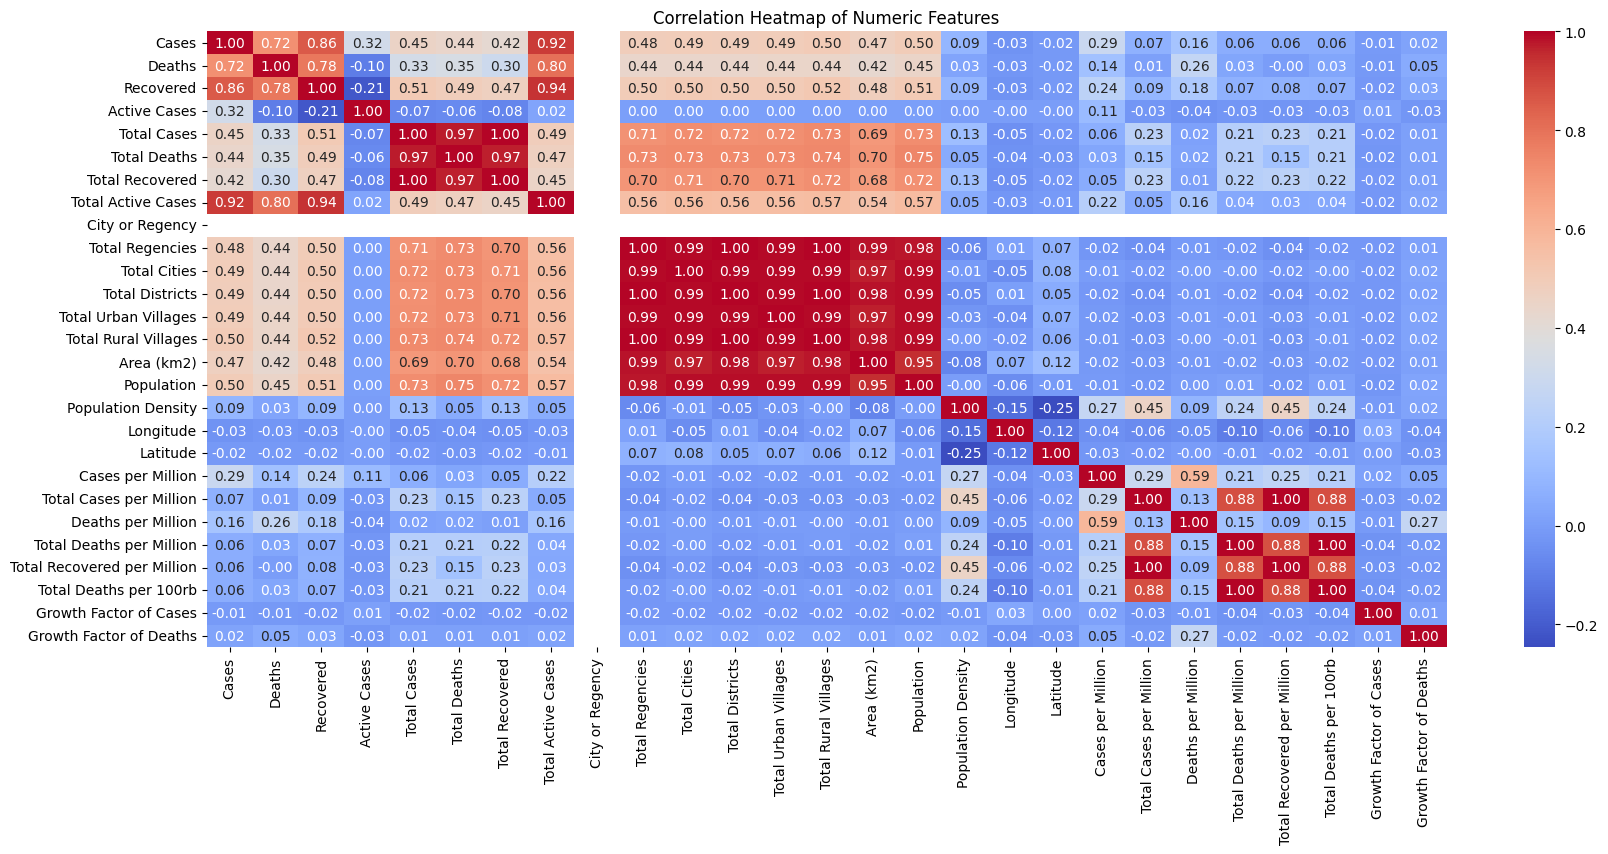

In [ ]:
# .shape: properti yang mengembalikan tuple (jumlah_baris, jumlah_kolom)
# .shape[1]: artinya mengambil jumlah kolom dari DataFrame

if df_heatmap.shape[1] >= 10: # This test aims to check whether the number of columns is sufficient to create a heatmap correlation.
    plt.figure(figsize=(20, 8))
    corr = df_heatmap.corr()# Menghitung matriks korelasi antar fitur numerik, Korelasi berkisar dari -1 (hubungan negatif sempurna) hingga +1 (hubungan positif sempurna), dengan 0 menunjukkan tidak ada hubungan.
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm') # (data matriks dalam corr, annot=True --> Menampilkan nilai korelasi di dalam sel heatmap, fmt='.2f' -->Menampilkan angka dengan dua desimal,cmap='coolwarm' --. warna)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap.')

In [ ]:
df_cleane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31822 entries, 10018 to 31585
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   Cases                        31822 non-null  int64  
 4   Deaths                       31822 non-null  int64  
 5   Recovered                    31822 non-null  int64  
 6   Active Cases                 31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province         

## **Delete Unused Columns**

In [ ]:
# Check data from dataset
# .isnull() -> untuk check data apakah ada yang NAN, Kosong dan rusak
# .sum() -> membuat rata rata nilai yang kosong berapa jumlahnya
# .sort_values(Ascending = False) -> mengurutkan berdasarkan valeu (nilai yang kosong) tanpa di urutkan sesuai urutan kolom
print(df_cleane.isnull().sum().sort_values(ascending=False))

City or Regency                31822
Special Status                 27264
Growth Factor of Deaths         3447
Growth Factor of Cases          1939
Island                           929
Total Rural Villages             929
Time Zone                        929
Province                         929
Total Urban Villages             904
Total Cities                     901
Deaths                             0
Location                           0
Location ISO Code                  0
Date                               0
Cases                              0
Active Cases                       0
Recovered                          0
Country                            0
Total Active Cases                 0
Total Deaths                       0
Location Level                     0
Total Recovered                    0
Total Cases                        0
Total Districts                    0
Total Regencies                    0
Continent                          0
Area (km2)                         0
L

In [ ]:
# Menghapus Nilai pada colums Province berdasarkan colums Location
# Data yang telah dibersihkan kemudian di copy dan indexnya dibuat ulang sesuai dengan banyaknya df.
df_cleane = df_cleane[df_cleane['Location'] != 'Indonesia'].copy().reset_index(drop=True)

In [ ]:
# # Delete columns yang memiliki data kosong, NAN, rusak yang > 30%. Dan columns yang tidak penting
df_cleane = df_cleane.drop(columns = ['Location ISO Code', 'Location', 'Active Cases', 'Total Active Cases', 'Total Cities',
                          'Location Level', 'City or Regency', 'Country', 'Continent', 'Island','Total Urban Villages',
                          'Time Zone', 'Special Status', 'Total Rural Villages', 'Longitude', 'Latitude', 'Total Districts'])

In [ ]:
df_cleane.head()

,Date,Cases,Deaths,Recovered,Total Cases,Total Deaths,Total Recovered,Province,Total Regencies,Area (km2),...,Cases per Million,Total Cases per Million,Deaths per Million,Total Deaths per Million,Total Recovered per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of Cases,Growth Factor of Deaths
0,1/1/2021,7,0,10,8753,358,7150,Aceh,18,57956,...,1.33,1668.11,0.0,68.23,1362.62,6.82,4.09%,81.69%,1.75,1.0
1,1/1/2022,0,0,0,38430,2066,36362,Aceh,18,57956,...,0.00,7323.83,0.0,393.73,6929.72,39.37,5.38%,94.62%,0.00,1.0
2,1/10/2021,15,0,14,8909,364,7308,Aceh,18,57956,...,2.86,1697.84,0.0,69.37,1392.73,6.94,4.09%,82.03%,0.94,0.0
3,1/10/2022,1,0,1,38433,2066,36366,Aceh,18,57956,...,0.19,7324.40,0.0,393.73,6930.48,39.37,5.38%,94.62%,NaN,1.0
4,1/11/2021,10,0,1,8919,364,7309,Aceh,18,57956,...,1.91,1699.75,0.0,69.37,1392.92,6.94,4.08%,81.95%,0.67,1.0


In [ ]:
df_cleane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30893 entries, 0 to 30892
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         30893 non-null  object 
 1   Cases                        30893 non-null  int64  
 2   Deaths                       30893 non-null  int64  
 3   Recovered                    30893 non-null  int64  
 4   Total Cases                  30893 non-null  int64  
 5   Total Deaths                 30893 non-null  int64  
 6   Total Recovered              30893 non-null  int64  
 7   Province                     30893 non-null  object 
 8   Total Regencies              30893 non-null  int64  
 9   Area (km2)                   30893 non-null  int64  
 10  Population                   30893 non-null  int64  
 11  Population Density           30893 non-null  float64
 12  Cases per Million            30893 non-null  float64
 13  Total Cases per 

## **Handling Missing Values And Cleaning Data**

<!DOCTYPE html>
<!DOCTYPE html>
<html>
<head>
    <style>
        h3{
            text-align:justify ;
            font-weight: bold;
        }
        .styled-text{
            text-align:justify ;
            font-size: 16 px;
            /* color: white; */
            margin: 30px;
            font-family: "Times New Roman";
            margin-bottom: 0.0;
            margin-top: 0.0;
        }
        .styled-img{
          position: absolute; top: 0px; right: 400px;
        }
    </style>
</head>
    <body>
        <img src='https://imgur.com/68u0dD2.png' class = 'styled-img'/>
    </body>
</html>

In [ ]:
# Check data from dataset
# .isnull() -> untuk check data apakah ada yang NAN, Kosong dan rusak
# .sum() -> membuat rata rata nilai yang kosong berapa jumlahnya
# .sort_values(Ascending = False) -> mengurutkan berdasarkan valeu (nilai yang kosong) tanpa di urutkan sesuai urutan kolom
print(df_cleane.isnull().sum().sort_values(ascending=False))

Growth Factor of Deaths        3442
Growth Factor of Cases         1935
Deaths                            0
Recovered                         0
Date                              0
Cases                             0
Total Deaths                      0
Total Cases                       0
Total Recovered                   0
Province                          0
Population                        0
Population Density                0
Total Regencies                   0
Area (km2)                        0
Total Cases per Million           0
Cases per Million                 0
Deaths per Million                0
Total Deaths per Million          0
Total Deaths per 100rb            0
Total Recovered per Million       0
Case Recovered Rate               0
Case Fatality Rate                0
dtype: int64


In [ ]:
# Proses Handling Missing Values (NAN) dalam colums 'Growth Factor of Cases' dan 'Growth Factor of Deaths'
# Handling menggunakan Neighbors terdekatnya.

from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2, weights="uniform")
df_cleane['Growth Factor of Cases'] = imputer.fit_transform(df_cleane[['Growth Factor of Cases']]).astype(float)
df_cleane['Growth Factor of Deaths'] = imputer.fit_transform(df_cleane[['Growth Factor of Deaths']]).astype(float)
# df_cleane['Total Urban Villages'] = imputer.fit_transform(df_cleane[['Total Urban Villages']]).astype(float)
# df_cleane['Total Cities'] = imputer.fit_transform(df_cleane[['Total Cities']]).astype(float)

# Jika hasil perhitungan ingin dibulatkan menggunakan code dibawah
# data_impulted1 = imputer.fit_transform(df_cleane[['Growth Factor of Cases']])
# data_impulted2 = imputer.fit_transform(df_cleane[['Growth Factor of Deaths']])
# df_cleane['Growth Factor of Cases'] = np.round(data_impulted1, decimals=2)
# df_cleane['Growth Factor of Deaths'] = np.round(data_impulted1, decimals=2)

In [ ]:
# Pembersihan Case Fatality Rate dan Case Recovered Rate dari type String to Dtype Float
df_cleane['Case Fatality Rate'] = df_cleane['Case Fatality Rate'].str.replace(',', '.').str.replace('%', '').astype(float) # Ganti koma dengan titik dan hapus karakter '%'
df_cleane['Case Recovered Rate'] = df_cleane['Case Recovered Rate'].str.replace(',', '.').str.replace('%', '').astype(float)

In [ ]:
df_cleane['Case Recovered Rate'] = df_cleane['Case Recovered Rate']/100

In [ ]:
# Check data from dataset
# .isnull() -> untuk check data apakah ada yang NAN, Kosong dan rusak
# .sum() -> membuat rata rata nilai yang kosong berapa jumlahnya
# .sort_values(Ascending = False) -> mengurutkan berdasarkan valeu (nilai yang kosong) tanpa di urutkan sesuai urutan kolom
print(df_cleane.isnull().sum().sort_values(ascending=False))

Date                           0
Cases                          0
Deaths                         0
Recovered                      0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Province                       0
Total Regencies                0
Area (km2)                     0
Population                     0
Population Density             0
Cases per Million              0
Total Cases per Million        0
Deaths per Million             0
Total Deaths per Million       0
Total Recovered per Million    0
Total Deaths per 100rb         0
Case Fatality Rate             0
Case Recovered Rate            0
Growth Factor of Cases         0
Growth Factor of Deaths        0
dtype: int64


## **Handling Values**

In [ ]:
# Membersihkan nilai Active Cases yang minus dan Menyesuaikan dengan nilai baru.

# Fungsi apply() digunakan untuk menerapkan fungsi ke setiap elemen di kolom tersebut.
# lambda x: max(0, x) adalah fungsi anonim yang:
# Mengembalikan x jika x ≥ 0.
# Mengembalikan 0 jika x < 0.
# Dengan kata lain, semua nilai negatif akan diubah menjadi nol.

if 'Total Active Cases' in df_cleane.columns:
      df_cleane['Total Active Cases'] = df_cleane['Total Active Cases'].apply(lambda x: x if x >= 0 else 0)

## **Convert Data Type**

In [ ]:
df_cleane['Date'] = pd.to_datetime(df_cleane['Date'])

## **Creat New Feature**

In [ ]:
# Mengekstak fitur dari date menggunakan atribut dt (datetime)

# Untuk Hari dalam Seminggu: # Perhatikan bahwa dayofweek mengembalikan integer (0=Senin, 6=Minggu).
# Jika Anda ingin label string ('Senin', 'Selasa', dll.), Anda perlu memetakannya secara manual.

# Day_of_week = df_cleane['Date'].dt.dayofweek # Untuk menangkap pola harian (misalnya, perbedaan pelaporan kasus/kematian pada akhir pekan).
# Month = df_cleane['Date'].dt.month # Bulan (Month), Untuk menangkap pola musiman atau perubahan kebijakan/perilaku bulanan.
# Year = df_cleane['Date'].dt.year # (Day of Year),  Untuk pola tahunan yang lebih halus.

# # insert() Berfungsi untuk menambahkan/menyisipkan kolom baru dengan posisi tertentu dalam DataFrame
# df_cleane.insert(1, 'Day of week', Day_of_week)
# df_cleane.insert(2, 'Month', Month)
# df_cleane.insert(3, 'Year', Year)

# df_cleane['Day_of_week'] = df_cleane['Date'].dt.dayofweek # Untuk menangkap pola harian (misalnya, perbedaan pelaporan kasus/kematian pada akhir pekan).
# df_cleane['Month'] = df_cleane['Date'].dt.month # Bulan (Month), Untuk menangkap pola musiman atau perubahan kebijakan/perilaku bulanan.
# df_cleane['Year'] = df_cleane['Date'].dt.year # (Day of Year),  Untuk pola tahunan yang lebih halus.

# Contoh opsional: Mengubah angka hari dalam seminggu menjadi nama hari
# days_map = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
# df_predi_1['Day_Name'] = df_predi_1['Day_of_Week'].map(days_map)

In [ ]:
Total_Cases_per_100rb = round((df_cleane['Total Cases per Million'] / 10), 2)
print(type(Total_Cases_per_100rb))

Total_Recovered_per_100rb = round((df_cleane['Total Recovered per Million'] / 10), 2)
print(type(Total_Recovered_per_100rb))

# Total_Death_per_100rb = round((df_proces['Total Deaths per Million'] / 10), 2)
# print(type(Total_Death_per_100rb))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# # Using insert() to add a column at position 2 (3rd column)
df_cleane.insert(17, "Total Cases per 100rb", Total_Cases_per_100rb, True)
df_cleane.insert(18, "Total Recovered per 100rb", Total_Recovered_per_100rb, True)
# df_proces.insert(23, "Total Death per 100rb", Total_Death_per_100rb, True)

In [ ]:
df_cleane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30893 entries, 0 to 30892
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         30893 non-null  datetime64[ns]
 1   Cases                        30893 non-null  int64         
 2   Deaths                       30893 non-null  int64         
 3   Recovered                    30893 non-null  int64         
 4   Total Cases                  30893 non-null  int64         
 5   Total Deaths                 30893 non-null  int64         
 6   Total Recovered              30893 non-null  int64         
 7   Province                     30893 non-null  object        
 8   Total Regencies              30893 non-null  int64         
 9   Area (km2)                   30893 non-null  int64         
 10  Population                   30893 non-null  int64         
 11  Population Density           30893 non-nu

In [ ]:
# --- AMBANG BATAS BERDASARKAN PERSENTIL DATA  ---
# Bisa menggunakan Persentil / Quartile Dalam menentukan THRESHOLD.
# Disi saya menggunakan Persentil ke 90 untuk HIGH dan 50 untuk MEDIUM, yang bertujuan supaya proporsi zona yang berbeda-beda.

# Total Recovered per 100rb
    # Recovered tinggi mungkin bisa berarti penyebarannya luas, jadi kontribusinya ke skor bisa tricky.
    # Jika kita menganggap recovered tinggi sebagai indikator penyebaran awal yang tinggi, maka bisa menambah skor.
    # Jika kita ingin recovered tinggi mengurangi risiko, kita bisa menambahkan logika pengurangan skor.
    # Untuk kesederhanaan awal, kita akan membiarkannya menambah skor jika Anda ingin
    # itu mencerminkan volume epidemi.

def calculate_risk_zone(row):
    score = 0
    # --- Penilaian Skor ---
    # Memberi bobot lebih pada Kasus dan Kematian karena mereka indikator risiko utama
    # Memberi poin lebih tinggi untuk ambang batas yang lebih tinggi

    # Total Cases per 100rb
    # Menggunakan P4 (2744.39) untuk batas "tinggi" dan P2 (678.68) untuk batas "sedang"
    if row["Total Cases per 100rb"] >= 2744.39: # P90
        score += 3
    elif row["Total Cases per 100rb"] >= 678.68: # P50 (Median)
        score += 2
    elif row["Total Cases per 100rb"] > 0: # 0 Artinya terdapat kasus, akan tetapi di bawah rata-rata, maka diberi nilai 1
        score += 1

    # Total Recovered per 100rb (Ini sangat penting untuk risiko)
    # Untuk saat ini recovered tinggi menambah skor, jika itu mencerminkan volume.
    # Namun, seringkali kita ingin recovered tinggi berarti risiko aktif lebih rendah
    # Jika ingin mencerminkan "beban kasus yang sudah sembuh":
    if row["Total Recovered per 100rb"] >= 2669.91: # P90
        score += 1 # Menunjukkan volume kasus yang besar sebelumnya
    elif row["Total Recovered per 100rb"] >= 577.64: # P50 (Median)
        score += 0.5

    # Kesembuhan (Bisa menjadi penambah atau pengurang, tergantung definisi risiko Anda)
    # Jika Anda ingin recovered yang tinggi mengurangi risiko secara keseluruhan:
    # if row["Total Recovered per 100rb"] >= THRESHOLD_RECOVERED_HIGH:
    #     score -= 1 # Contoh: mengurangi 1 poin risiko jika recovered sangat tinggi
    # elif row["Total Recovered per 100rb"] >= THRESHOLD_RECOVERED_MEDIUM:
    #     pass # tidak menambah/mengurangi

    # Total Deaths per 100rb
    # Skalanya lebih kecil dikarenakan persentilnya juga kecil
    if row["Total Deaths per 100rb"] >= 83.47: # P90
        score += 4 # Bobot lebih tinggi karena kematian adalah indikator keparahan
    elif row["Total Deaths per 100rb"] >= 15.81: # P50 (Median)
        score += 2
    elif row["Total Deaths per 100rb"] > 0: # 0 Artinya terdapat Kematian, akan tetapi di bawah rata-rata, maka diberi nilai 1
        score += 1

    # --- Penentuan Zona Akhir ---
    # Tujuannya adalah membagi provinsi ke 3 zona secara lebih merata
    if score >= 5:  # Misalnya, kombinasi tinggi dari dua metrik utama
        return "Zona Merah"
    elif score >= 2: # Kombinasi moderat atau satu metrik tinggi
        return "Zona Kuning"
    else:
        return "Zona Hijau" # kondisi low cases

# Terapkan fungsi ini ke DataFrame Anda
df_cleane["Zona Risiko"] = df_cleane.apply(calculate_risk_zone, axis = 1)

# Setelah menjalankan ini, periksa distribusinya:
print(df_cleane['Zona Risiko'].value_counts())

Zona Risiko
Zona Kuning    26865
Zona Merah      3626
Zona Hijau       402
Name: count, dtype: int64


In [ ]:
# # Membua colums Recovered per Million karna belum ada
# Recovered_per_Million = round((df_proces['Recovered'] / df_proces['Population']) * 1000000, 2)
# df_proces.insert(19, 'Recovered per Million', Recovered_per_Million)

In [ ]:
# def create_time_since_outbreak_start(df_copy, date_col = 'Date', location_col = 'Province', cases_col = 'Total Cases'):
#     """
#     Menghitung jumlah hari sejak awal wabah untuk setiap lokasi.

#     Args:
#         df (pd.DataFrame): DataFrame input yang berisi data.
#         date_col (str): Nama kolom tanggal (harus bertipe datetime).
#         location_col (str): Nama kolom yang mengidentifikasi lokasi.
#         cases_col (str): Nama kolom yang menunjukkan jumlah kasus (e.g., 'Total Cases', 'Cases').

#     Returns:
#         pd.DataFrame: DataFrame dengan kolom 'Time_Since_Outbreak_Start' yang baru.
#     """
#     df_copy = df_copy.copy()

#     # # Urutkan data berdasarkan lokasi dan tanggal untuk memastikan perhitungan yang benar
#     df = df_copy.sort_values(by=[location_col, date_col])

#     # Temukan tanggal awal wabah (kasus pertama > 0) untuk setiap lokasi
#     first_cases_date = df_copy[df_copy[cases_col] > 0].groupby(location_col)[date_col].min()

#     # Gabungkan tanggal awal wabah kembali ke DataFrame utama
#     df_copy = df_copy.merge(first_cases_date.rename('Outbreak Start Date'), on=location_col, how='left')

#     # Hitung selisih hari dari tanggal awal wabah
#     # Jika Outbreak_Start_Date adalah NaN (artinya tidak ada kasus > 0 untuk lokasi itu), biarkan NaN atau isi dengan nilai default
#     df_copy['Time Since Outbreak Start'] = (df_copy[date_col] - df_copy['Outbreak Start Date']).dt.days

#     # Hapus kolom temporer
#     df_copy = df_copy.drop(columns=['Outbreak Start Date'])

#     return df_copy

# df_proces = create_time_since_outbreak_start(df_proces,
#                                              date_col='Date',
#                                              location_col='Province', # Atau 'Location ISO Code'
#                                              cases_col='Total Cases') # Atau 'Cases' jika itu yang lebih dulu mencatat kasus

In [ ]:
df_cleane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30893 entries, 0 to 30892
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         30893 non-null  datetime64[ns]
 1   Cases                        30893 non-null  int64         
 2   Deaths                       30893 non-null  int64         
 3   Recovered                    30893 non-null  int64         
 4   Total Cases                  30893 non-null  int64         
 5   Total Deaths                 30893 non-null  int64         
 6   Total Recovered              30893 non-null  int64         
 7   Province                     30893 non-null  object        
 8   Total Regencies              30893 non-null  int64         
 9   Area (km2)                   30893 non-null  int64         
 10  Population                   30893 non-null  int64         
 11  Population Density           30893 non-nu

## **Encode Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder # merubah nilai label yang tadinya string menjadi int/float
le = LabelEncoder() # definisi model encode

In [ ]:
# df_cleane['Province_encoded'] = le.fit_transform(df_cleane['Province'])  # 'label' ganti dengan nama kolom aslinya

Province_encoded = le.fit_transform(df_cleane['Province'])  # 'label' ganti dengan nama kolom aslinya
df_cleane.insert(4, 'Province encoded', Province_encoded)

In [ ]:
df_cleane['Zona Risiko Encode'] = le.fit_transform(df_cleane['Zona Risiko'])  # 'label' ganti dengan nama kolom aslinya

In [ ]:
# Setelah menjalankan ini, periksa distribusinya:
print(df_cleane['Zona Risiko Encode'].value_counts()) # Zona resiko 0 = zona hijau, 1 = zona kuning dan 2 = zona merah

Zona Risiko Encode
1    26865
2     3626
0      402
Name: count, dtype: int64


In [ ]:
df_cleane

,Date,Cases,Deaths,Recovered,Province encoded,Total Cases,Total Deaths,Total Recovered,Province,Total Regencies,...,Total Recovered per Million,Total Cases per 100rb,Total Recovered per 100rb,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of Cases,Growth Factor of Deaths,Zona Risiko,Zona Risiko Encode
0,2021-01-01,7,0,10,0,8753,358,7150,Aceh,18,...,1362.62,166.81,136.26,6.82,4.09,0.8169,1.750000,1.00,Zona Kuning,1
1,2022-01-01,0,0,0,0,38430,2066,36362,Aceh,18,...,6929.72,732.38,692.97,39.37,5.38,0.9462,0.000000,1.00,Zona Kuning,1
2,2021-01-10,15,0,14,0,8909,364,7308,Aceh,18,...,1392.73,169.78,139.27,6.94,4.09,0.8203,0.940000,0.00,Zona Kuning,1
3,2022-01-10,1,0,1,0,38433,2066,36366,Aceh,18,...,6930.48,732.44,693.05,39.37,5.38,0.9462,1.336134,1.00,Zona Kuning,1
4,2021-01-11,10,0,1,0,8919,364,7309,Aceh,18,...,1392.92,169.98,139.29,6.94,4.08,0.8195,0.670000,1.00,Zona Kuning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30888,2021-09-08,459,37,1347,33,100316,2566,82100,Sumatera Utara,25,...,5519.37,674.40,551.94,17.25,2.56,0.8184,1.020000,0.95,Zona Kuning,1
30889,2022-09-08,64,0,73,33,158623,3285,154624,Sumatera Utara,25,...,10394.97,1066.38,1039.50,22.08,2.07,0.9748,1.080000,1.00,Zona Kuning,1
30890,2020-09-09,132,1,91,33,7964,343,4830,Sumatera Utara,25,...,324.71,53.54,32.47,2.31,4.31,0.6065,1.230000,0.33,Zona Kuning,1
30891,2021-09-09,431,7,900,33,100747,2573,83000,Sumatera Utara,25,...,5579.87,677.30,557.99,17.30,2.55,0.8238,0.940000,0.19,Zona Kuning,1


## **Lag Features**

In [ ]:
# Membuat lagged features

columns_to_lag = [
    'Cases', 'Deaths', 'Recovered', 'Total Active Cases', # 'Total Cases', 'Total Deaths', 'Total Recovered',
    'Growth Factor of Cases', 'Growth Factor of Deaths','Case Fatality Rate', 'Case Recovered Rate' # Jika Anda juga ingin menggunakan target historis
]

# Definisi ukuran lag yang ingin Anda coba
lags = [1, 3, 7] # Contoh lags

for col in columns_to_lag:
  if col in df_cleane.columns: # Pastikan kolom ada di DataFrame Anda
    for lag in lags:
      new_col_name = f'{col}_lag_{lag}_Days'
      # Pastikan untuk melakukan groupby pada lokasi sebelum shift
      df_cleane[new_col_name] = df_cleane.groupby('Province')[col].shift(lag)
      # Jika kolom yang dilagged adalah CFR/CRR dan tipenya object, Anda perlu mengkonversinya
      if 'Rate' in col and df_cleane[new_col_name].dtype == 'bject':
        df_cleane[new_col_name] = pd.to_numeric(
            df_cleane[new_col_name].astype(str).str.replace(',','.').str.replace('%',''),
            errors='coerce'
            )

# Moving Average Cases, Deaths and Recovered
# .shift(1) di sini untuk memastikan bahwa MA adalah dari hari sebelumnya,
# menghindari kebocoran data untuk prediksi hari ini. min_periods=1 agar tidak NaN di awal.

# Cases_7_Day_MA = df_features_cfr.groupby('Province')['Cases'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1))
# Deaths_7_Day_MA = df_features_cfr.groupby('Province')['Deaths'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1))
# Recovered_7_Day_MA = df_features_cfr.groupby('Province')['Recovered'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1))

# df_features_cfr.insert(31, 'Cases 7 Day MA', Cases_7_Day_MA)
# df_features_cfr.insert(32, 'Deaths 7 Day MA', Deaths_7_Day_MA)
# df_features_cfr.insert(33, 'Recovered 7 Day MA', Recovered_7_Day_MA)

In [ ]:
df_cleane = df_cleane.drop(columns=['Province'])

In [ ]:
# Check nilai NaN atau Kosong dalam Data Frame
print(df_cleane.isnull().sum().sort_values(ascending=False))

Recovered_lag_7_Days                  238
Deaths_lag_7_Days                     238
Growth Factor of Deaths_lag_7_Days    238
Case Fatality Rate_lag_7_Days         238
Case Recovered Rate_lag_7_Days        238
Growth Factor of Cases_lag_7_Days     238
Cases_lag_7_Days                      238
Cases_lag_3_Days                      102
Deaths_lag_3_Days                     102
Growth Factor of Deaths_lag_3_Days    102
Case Fatality Rate_lag_3_Days         102
Case Recovered Rate_lag_3_Days        102
Recovered_lag_3_Days                  102
Growth Factor of Cases_lag_3_Days     102
Deaths_lag_1_Days                      34
Growth Factor of Deaths_lag_1_Days     34
Growth Factor of Cases_lag_1_Days      34
Case Fatality Rate_lag_1_Days          34
Recovered_lag_1_Days                   34
Case Recovered Rate_lag_1_Days         34
Cases_lag_1_Days                       34
Total Regencies                         0
Area (km2)                              0
Total Deaths                      

In [ ]:
# Penanganan Nilai NaN dari hasil shift(), dengan menghapus baris-baris ini karena mereka tidak memiliki data historis yang cukup untuk prediksi.
df_cleane.dropna(inplace=True)
df_cleane.reset_index(drop=True, inplace=True)

In [ ]:
# Check kembali ada nilai NaN atau Kosong dalam Data Frmae
print(df_cleane.isnull().sum().sort_values(ascending=False))

Date                                  0
Cases                                 0
Deaths                                0
Recovered                             0
Province encoded                      0
Total Cases                           0
Total Deaths                          0
Total Recovered                       0
Total Regencies                       0
Area (km2)                            0
Population                            0
Population Density                    0
Cases per Million                     0
Total Cases per Million               0
Deaths per Million                    0
Total Deaths per Million              0
Total Recovered per Million           0
Total Cases per 100rb                 0
Total Recovered per 100rb             0
Total Deaths per 100rb                0
Case Fatality Rate                    0
Case Recovered Rate                   0
Growth Factor of Cases                0
Growth Factor of Deaths               0
Zona Risiko                           0


# **Modeling**

<!DOCTYPE html>
<html lang='en'>

<!-- <head>
    <title>List di dalam List</title>
</head> -->

<body>
      <h1>Tindakan Lanjutan</h1>
      <ol>
          <li> Terapkan teknik penanganan ketidakseimbangan kelas:
              <ul>
                  <li>SMOTE / ADASYN (oversampling)</li>
                  <li>Smote / Adasyn (oversampling)</li>
                  <li>Undersampling pada kelas mayoritas</li>
                  <li>Class weights (class_weight='balanced' untuk LogisticRegression, DecisionTree, dll)</li>
              </ul>
          </li>
          <li>Evaluasi menggunakan Macro Average
              <ul>
                    <li>Macro F1-score bisa jadi lebih menggambarkan performa di dataset tak seimbang.</li>
                </ul>
          </li>
          <li>Gunakan k-Fold Cross Validation
              <ul>
                    <li>Evaluasi akurasi yang lebih stabil di beberapa subset data.</li>
                </ul>
          </li>
      </ol>
</body>

</html>

## **Import Model**

In [ ]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

model_clasifer = []

# model_clasifer.append(('Naive Bayes', GaussianNB()))
model_clasifer.append(('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto'))) # n_neighbors=3 --> 98.4xx
model_clasifer.append(('Random Forest', RandomForestClassifier(n_estimators=150, criterion="gini", max_depth=5, class_weight='balanced', max_features='sqrt', random_state=42))) # n_estimators=150,max_depth=2 --> 98.4xx
model_clasifer.append(('Decision Tree', DecisionTreeClassifier(criterion="gini", max_depth=5, class_weight='balanced',max_features='sqrt', random_state=42, splitter='best' ))) # max_depth=4 --> 98.0xx
model_clasifer.append(('Xgboost', xgb.XGBClassifier(objective='reg:squarederror', n_estimators = 100 ,tree_method="hist", n_jobs=1, max_depth = 5, sampling_method = 'uniform'))) #  n_estimators = 100 , max_depth = 3 --> 99.9xx
model_clasifer.append(('MLP Classifier', MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42, learning_rate_init=0.001, alpha=0.01, early_stopping=True))) # hidden_layer_sizes=(100,), max_iter=1000, random_state=42, learning_rate_init=0.0001, alpha=0.0001 --> 99.2
model_clasifer.append(('Logistic Regression',LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, class_weight= 'balanced', random_state=42, C = 1, tol=0.0001, fit_intercept=True))) # penalty='l2', solver='lbfgs', max_iter=1000, class_weight= 'balanced', random_state=42 --> 96.4

## **Split Data**

In [ ]:
df_cleane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30655 entries, 0 to 30654
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                30655 non-null  datetime64[ns]
 1   Cases                               30655 non-null  int64         
 2   Deaths                              30655 non-null  int64         
 3   Recovered                           30655 non-null  int64         
 4   Province encoded                    30655 non-null  int64         
 5   Total Cases                         30655 non-null  int64         
 6   Total Deaths                        30655 non-null  int64         
 7   Total Recovered                     30655 non-null  int64         
 8   Total Regencies                     30655 non-null  int64         
 9   Area (km2)                          30655 non-null  int64         
 10  Population            

In [ ]:
X = df_cleane.drop(columns=['Zona Risiko', 'Date', 'Zona Risiko Encode'])
y = df_cleane['Zona Risiko Encode']

In [ ]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 26651, 2: 3602, 0: 402})


In [ ]:
# Oversampling
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, SMOTEN
# ada = ADASYN(random_state=42)
# X_res, y_res = ada.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))

# from imblearn.under_sampling import NearMiss
# # Undersampling method
# undersample = NearMiss(version=1, n_neighbors=3)
# # transform the dataset
# X_res, y_res = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y_res)
# print(counter)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# X_train.info()

In [ ]:
# y_train

In [ ]:
# print(pd.Series(y_res).value_counts(normalize=True))

## **Train Model**

🔍 Penyebab:

SMOTE adalah oversampling technique dari imblearn.pipeline.Pipeline, bukan transformer biasa dari sklearn.

💡 Penjelasan:

sklearn.pipeline.Pipeline hanya menerima step transformer yang memiliki .fit() dan .transform() seperti:

- StandardScaler()

- PCA()

- OneHotEncoder()

Tetapi SMOTE hanya bisa digunakan di dalam imblearn.pipeline.Pipeline, karena dia bukan transformer biasa tapi over-sampler yang mengubah X dan y secara bersamaan (bukan hanya X saja).

In [ ]:
from sklearn.preprocessing import StandardScaler # Atau MinMaxScaler
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

# Inisialisasi scaler
scaler = StandardScaler()
# scaler.fit() # yang di schaling adalah featuresnya, disini data features ada di X

# Buat pipeline (opsional tapi praktik yang baik)
# Pipeline ini memastikan scaling hanya dilakukan pada data yang benar (training dan testing terpisah)
# pipeline seperti sebuah pabrik yang memiliki beberapa tahapan proses, dimana setiap tahapan proses memiliki nama/transformers.
# Pipeline hanya menerima objek transformer atau estimator
# Konfigurasi TimeSeriesSplit untuk cross_val_score
# tscv = TimeSeriesSplit(n_splits=10) # Sesuaikan jumlah splits sesuai kebutuhan

In [ ]:
# Training Model
from sklearn.model_selection import cross_val_score
from logging import exception
from sklearn.model_selection import KFold, StratifiedKFold

results = []
names = []
trained_models = [] # Variabel baru untuk menyimpan/menampung hasil model yang sudah dilatih
cv_score = {}

for name, model in model_clasifer:
    print(f"Menguji model {name}")

    # Buat pipeline baru untuk SETIAP MODEL di dalam loop
    pipeline = Pipeline(steps=[ # <--- Beri nama yang lebih deskriptif
        ('scaler', scaler), # Menerapkan StandardScaler pada kolom numerik
        ('smote', SMOTEN(sampling_strategy='auto', random_state=42)), # teknik oversampling
        ('regressor', model) # <--- GUNAKAN `model` DI SINI
        ])

    try:
      names.append(names)
      # Latih pipeline ini pada seluruh data training untuk prediksi
      print(f"Melatih {name} pada seluruh data training untuk prediksi...")

      # Penjelasan:
      # Fungsi cross_val_score() atau cross_validate() melatih model pada tiap fold (K kali), lalu menguji performanya.
      # Namun, model hasil akhir tidak disimpan.
      # Jadi, setelah cross-validation selesai, kamu harus tetap melakukan .fit() pada seluruh data jika ingin model yang siap dipakai untuk prediksi baru.

      # Buat objek KFold
      kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
      # Evaluasi menggunakan cross_val_score
      scores = cross_val_score(pipeline,
                               X_train,
                               y_train,
                               cv=kfold,
                               scoring='accuracy') # Fit terjadi di sini

      # Tapi model tidak bisa langsung digunakan karena belum fit ke seluruh data
      cv_score[name] = {
                       'Accuracy_Score': scores.mean()*100,
                      } # Simpan metrik ke acc_score
      # cv_score.append((name,scores)) # Menyimpan hasil perhitungan scores

      # Melatih model
      pipeline.fit(X_train, y_train) # Melatih model
      trained_models.append((name, pipeline)) # Menyimpan hasil latih model

    except Exception as e:  # Kapital E
      print(f"Error saat menguji {name}: {e}")
    print("-" * 50)

# print("\n--- Ringkasan Akurasi Model Fit Training ---")
# for name, scores in cv_score.items():
#   print(f"Model: {name}")
#   print(f"  CV Accuracy Score Test: {scores['accuracy']:.2f}")
#   # print(f"  F1_Score Accuracy Score Test : {scores['f1_score']:}")
#   print("-" * 30)

Menguji model K-Nearest Neighbors
Melatih K-Nearest Neighbors pada seluruh data training untuk prediksi...
--------------------------------------------------
Menguji model Random Forest
Melatih Random Forest pada seluruh data training untuk prediksi...
--------------------------------------------------
Menguji model Decision Tree
Melatih Decision Tree pada seluruh data training untuk prediksi...
--------------------------------------------------
Menguji model Xgboost
Melatih Xgboost pada seluruh data training untuk prediksi...
--------------------------------------------------
Menguji model MLP Classifier
Melatih MLP Classifier pada seluruh data training untuk prediksi...
--------------------------------------------------
Menguji model Logistic Regression
Melatih Logistic Regression pada seluruh data training untuk prediksi...
--------------------------------------------------


In [ ]:
print("\n--- Ringkasan Rata-rata Akurasi Model Fit Training Cross Val Score ---")
for name, scores in cv_score.items():
  print(f"Model: {name}")
  print(f"CV Accuracy Score Test: {scores['Accuracy_Score']:}")


--- Ringkasan Rata-rata Akurasi Model Fit Training Cross Val Score ---
Model: K-Nearest Neighbors
CV Accuracy Score Test: 98.24714149614195
Model: Random Forest
CV Accuracy Score Test: 99.79122397487737
Model: Decision Tree
CV Accuracy Score Test: 99.17360195462051
Model: Xgboost
CV Accuracy Score Test: 99.95215500164048
Model: MLP Classifier
CV Accuracy Score Test: 99.51719651595118
Model: Logistic Regression
CV Accuracy Score Test: 95.5069539201413


## **Prediction Data Train and Data Test**

In [ ]:
# Prediction Data Train
model_summaries_train = {}
acc_score = {}

for name, model in trained_models:
  try:
        predictions = model.predict(X_train)  # Prediksi Data train
        # model_summaries_train.append((name, predictions))
        model_summaries_train[name] = predictions     # Simpan prediksi

        print(f"Prediksi berhasil untuk {name}.")
        Acc = accuracy_score(y_train, predictions)
        f1_scr = f1_score(y_train, predictions, average='micro')
        conf_matrix = confusion_matrix(y_train, predictions)
        # print(f"  R2 Score (Test): {r2_test:.4f}")
        # print(f"  MAE (Test): {mae_test:.4f}")
        # print(f"  RMSE (Test): {rmse_test:.4f}")
        acc_score[name] = {
                       'Accuracy_Score_Train': Acc*100,
                       'F1_Score': f1_scr,
                       'Confusion_Matrix': conf_matrix,
                      } # Simpan metrik ke acc_score

        # (Opsional) Evaluasi R2 Score untuk data training jika Anda mau
        # r2_train = r2_score(y_train, predictions)
        # mae_train = mean_absolute_error(y_train, predictions)
        # rmse_train = np.sqrt(mean_squared_error(y_train, predictions))
        # print(f"  R2 Score (Train): {r2_train:.4f}, MAE (Train): {mae_train:.4f}, RMSE (Train): {rmse_train:.4f}")
  except Exception as e:
        print(f"Error saat prediksi dengan {name}: Tipe Error = {type(e).__name__}, Pesan = {e}")

print("\n--- Ringkasan Akurasi (Metrik Regresi) Model di Data Training ---")
for name, scores in acc_score.items():
  print(f"Model: {name}")
  print(f"  Accuracy_Score (Train): {scores['Accuracy_Score_Train']:.2f}")
  print(f"  F1_Score (Train): {scores['F1_Score']:}")
  # print(f"  Confusion_Matrix (Train): {scores['Confusion_Matrix']:}")
  print("-" * 30)

Prediksi berhasil untuk K-Nearest Neighbors.
Prediksi berhasil untuk Random Forest.
Prediksi berhasil untuk Decision Tree.
Prediksi berhasil untuk Xgboost.
Prediksi berhasil untuk MLP Classifier.
Prediksi berhasil untuk Logistic Regression.

--- Ringkasan Akurasi (Metrik Regresi) Model di Data Training ---
Model: K-Nearest Neighbors
  Accuracy_Score (Train): 99.13
  F1_Score (Train): 0.9912574485668305
------------------------------
Model: Random Forest
  Accuracy_Score (Train): 99.82
  F1_Score (Train): 0.9981731982079944
------------------------------
Model: Decision Tree
  Accuracy_Score (Train): 98.86
  F1_Score (Train): 0.9886042364403462
------------------------------
Model: Xgboost
  Accuracy_Score (Train): 100.00
  F1_Score (Train): 1.0
------------------------------
Model: MLP Classifier
  Accuracy_Score (Train): 99.73
  F1_Score (Train): 0.9972597973119917
------------------------------
Model: Logistic Regression
  Accuracy_Score (Train): 96.15
  F1_Score (Train): 0.961463181

In [ ]:
# Prediction Data Test
pred_test = {}
score = {}

for name, model in trained_models:
    # predictions = model.predict(X_test)  # Prediksi langsung
    # pred_test[name] = predictions  # Simpan model yang sudah dilatih
  try:
        predictions = model.predict(X_test)  # Prediksi Data Test Ini menghasilkan array NumPy dengan panjang 8770 (sesuai jumlah sampel di X_test)
        print(f"Prediksi berhasil untuk {name}.")
        pred_test[name] = predictions # <--- SIMPAN PREDIKSI KE KAMUS (DICTIONARY)     # Simpan prediksi
        # Menghitung dan menampilkan metrik performa pada data testing (prediksi vs y_test)
        Acc = accuracy_score(y_test, predictions)
        f1_scr = f1_score(y_test, predictions, average='micro')
        conf_matrix = confusion_matrix(y_test, predictions)
        recall_scr = recall_score(y_test, predictions, average = 'micro')
        precision_scr = precision_score(y_test, predictions, average='micro')
        score[name] = {
                       'Accuracy_Score': Acc*100,
                       'F1_Score': f1_scr,
                       'Confusion_Matrix': conf_matrix,
                       'recall_score' : recall_scr,
                       'precision_score' : precision_scr,
                      } # Simpan metrik ke acc_score

        # (Opsional) Evaluasi R2 Score untuk data training jika Anda mau
        # r2_train = r2_score(y_train, predictions)
        # mae_train = mean_absolute_error(y_train, predictions)
        # rmse_train = np.sqrt(mean_squared_error(y_train, predictions))
        # print(f"  R2 Score (Train): {r2_train:.4f}, MAE (Train): {mae_train:.4f}, RMSE (Train): {rmse_train:.4f}")
  except Exception as e:
        print(f"Error saat prediksi dengan {name}: Tipe Error = {type(e).__name__}, Pesan = {e}")

print("\n--- Ringkasan Akurasi (Metrik Regresi) Model di Data Testing ---")
for name, scores in score.items():
  print(f"Model: {name}")
  print(f"  Accuracy_Score (Test): {scores['Accuracy_Score']:.2f}")
  print(f"  F1_Score (Test): {scores['F1_Score']:}")
  # print(f"  Confusion_Matrix (Train): {scores['Confusion_Matrix']:}")
  print("-" * 30)

Prediksi berhasil untuk K-Nearest Neighbors.
Prediksi berhasil untuk Random Forest.
Prediksi berhasil untuk Decision Tree.
Prediksi berhasil untuk Xgboost.
Prediksi berhasil untuk MLP Classifier.
Prediksi berhasil untuk Logistic Regression.

--- Ringkasan Akurasi (Metrik Regresi) Model di Data Testing ---
Model: K-Nearest Neighbors
  Accuracy_Score (Test): 98.41
  F1_Score (Test): 0.9840814196242171
------------------------------
Model: Random Forest
  Accuracy_Score (Test): 99.74
  F1_Score (Test): 0.9973903966597077
------------------------------
Model: Decision Tree
  Accuracy_Score (Test): 98.63
  F1_Score (Test): 0.9862995824634656
------------------------------
Model: Xgboost
  Accuracy_Score (Test): 99.87
  F1_Score (Test): 0.9986951983298539
------------------------------
Model: MLP Classifier
  Accuracy_Score (Test): 99.35
  F1_Score (Test): 0.9934759916492694
------------------------------
Model: Logistic Regression
  Accuracy_Score (Test): 95.59
  F1_Score (Test): 0.95589770

In [ ]:
# 7. Predict & Evaluate
for (name, pred) in pred_test.items():
  # y_pred = model.predict(X_test)
  print(f"\nAccuracy {name}:", accuracy_score(y_test, pred))
  print("Classification Report:\n", classification_report(y_test, pred))


Accuracy K-Nearest Neighbors: 0.9840814196242171
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       106
           1       0.99      0.99      0.99      6651
           2       0.97      0.96      0.97       907

    accuracy                           0.98      7664
   macro avg       0.89      0.86      0.88      7664
weighted avg       0.98      0.98      0.98      7664


Accuracy Random Forest: 0.9973903966597077
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00      6651
           2       0.98      1.00      0.99       907

    accuracy                           1.00      7664
   macro avg       0.99      1.00      1.00      7664
weighted avg       1.00      1.00      1.00      7664


Accuracy Decision Tree: 0.9862995824634656
Classification Report:
               precision    r

## **Visualization Accuracy Clasification Data Train and Data Testing**

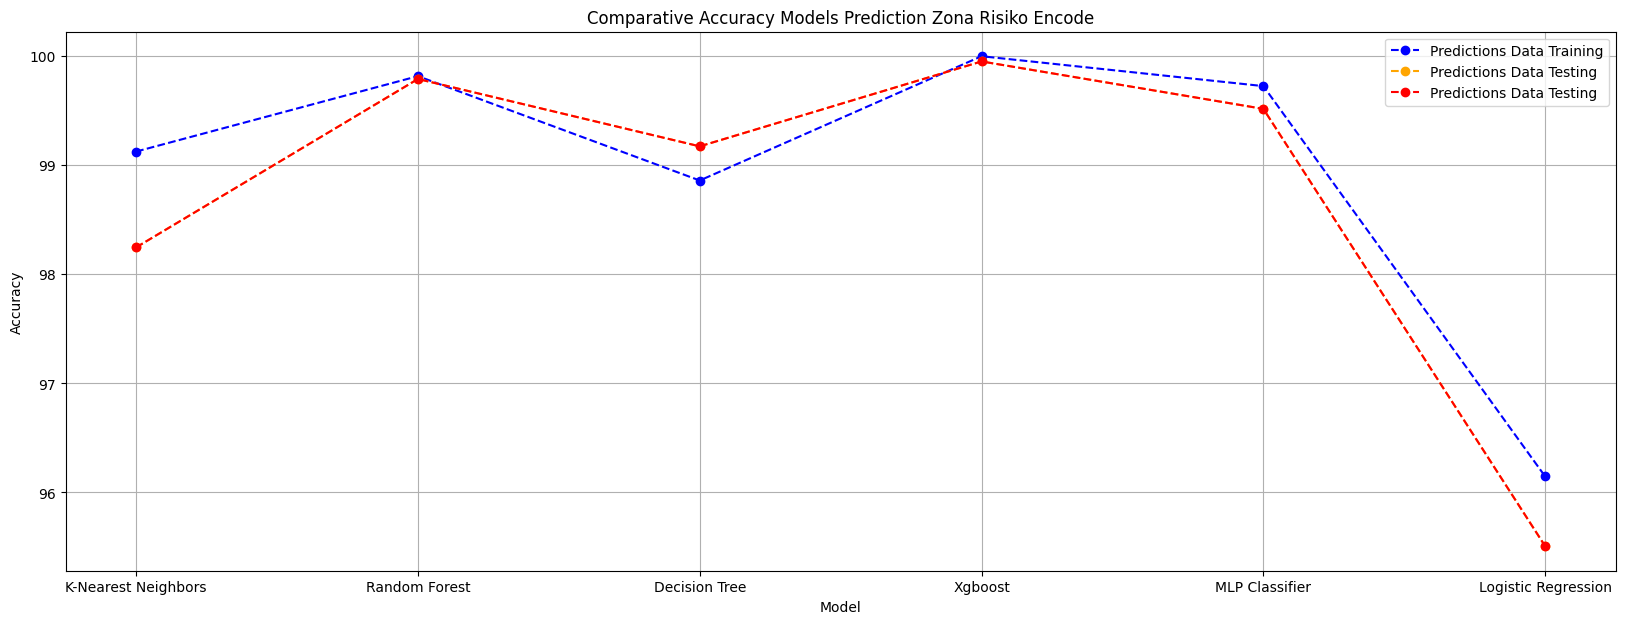

In [ ]:
# Comparative Accuracy Models

# Ploating Prediction Data Training
x_model_train = list(acc_score.keys())
y_pred_train = [acc_score['Accuracy_Score_Train'] for acc_score in acc_score.values()]

# Ploating Prediction Data Testing
x_model_test = list(score.keys()) # Nama model sebagai label sumbu X
y_pred_test = [scores['Accuracy_Score'] for scores in score.values()] # Nilai akurasi Training/Testing

# Ploating CV Score Testing
x_model_test = list(cv_score.keys()) # Nama model sebagai label sumbu X
y_pred_test = [cv_score['Accuracy_Score'] for cv_score in cv_score.values()] # Nilai akurasi Training/Testing

# Konversi indeks untuk sumbu X
x = np.arange(len(x_model_train))  # Sumbu X untuk Model
x_train_pred = np.arange(len(x_model_test))

plt.figure(figsize=(20, 7))
# Scatter plot untuk titik data
# plt.scatter(acc_score.keys(), acc_score.values(), color='blue', label='Accuracy not using cv', zorder=3)

# Garis antar titik data
plt.plot(x_model_train, y_pred_train, color='blue', linestyle='dashed', marker='o', label="Predictions Data Training")
plt.plot(x_model_test, y_pred_test, color='orange', linestyle='dashed', marker='o', label="Predictions Data Testing")
plt.plot(x_model_test, y_pred_test, color='red', linestyle='dashed', marker='o', label="Predictions Data Testing")

# Konfigurasi plot
plt.title(f"Comparative Accuracy Models Prediction {y_test.name}")
plt.xlabel("Model")
plt.ylabel("Accuracy")
leg = plt.legend(loc='upper right') # ini untuk mengatur posisi label, tanpa ini labels tidak akan di ganerate
plt.grid(True)
plt.show()

In [ ]:
# Gap antara Testing Data dengan Train Data
for (name, train_metrics), (_, test_metrics) in zip(acc_score.items(), score.items()):
    train_acc = train_metrics['Accuracy_Score_Train']
    test_acc = test_metrics['Accuracy_Score']
    print(f"{name}: GAP = {abs(train_acc - test_acc):.2f}%")

K-Nearest Neighbors: GAP = 0.72%
Random Forest: GAP = 0.08%
Decision Tree: GAP = 0.23%
Xgboost: GAP = 0.13%
MLP Classifier: GAP = 0.38%
Logistic Regression: GAP = 0.56%


In [ ]:
# Gap antara Prediction (Testing Data) dan CV Score
for (name, test_metric), (_, cv_metric) in zip(score.items(), cv_score.items()):
    test_acc = test_metrics['Accuracy_Score']
    cv_acc = cv_metric['Accuracy_Score']
    print(f"{name}: GAP = {abs(test_acc - cv_acc):.2f}%")

K-Nearest Neighbors: GAP = 2.66%
Random Forest: GAP = 4.20%
Decision Tree: GAP = 3.58%
Xgboost: GAP = 4.36%
MLP Classifier: GAP = 3.93%
Logistic Regression: GAP = 0.08%


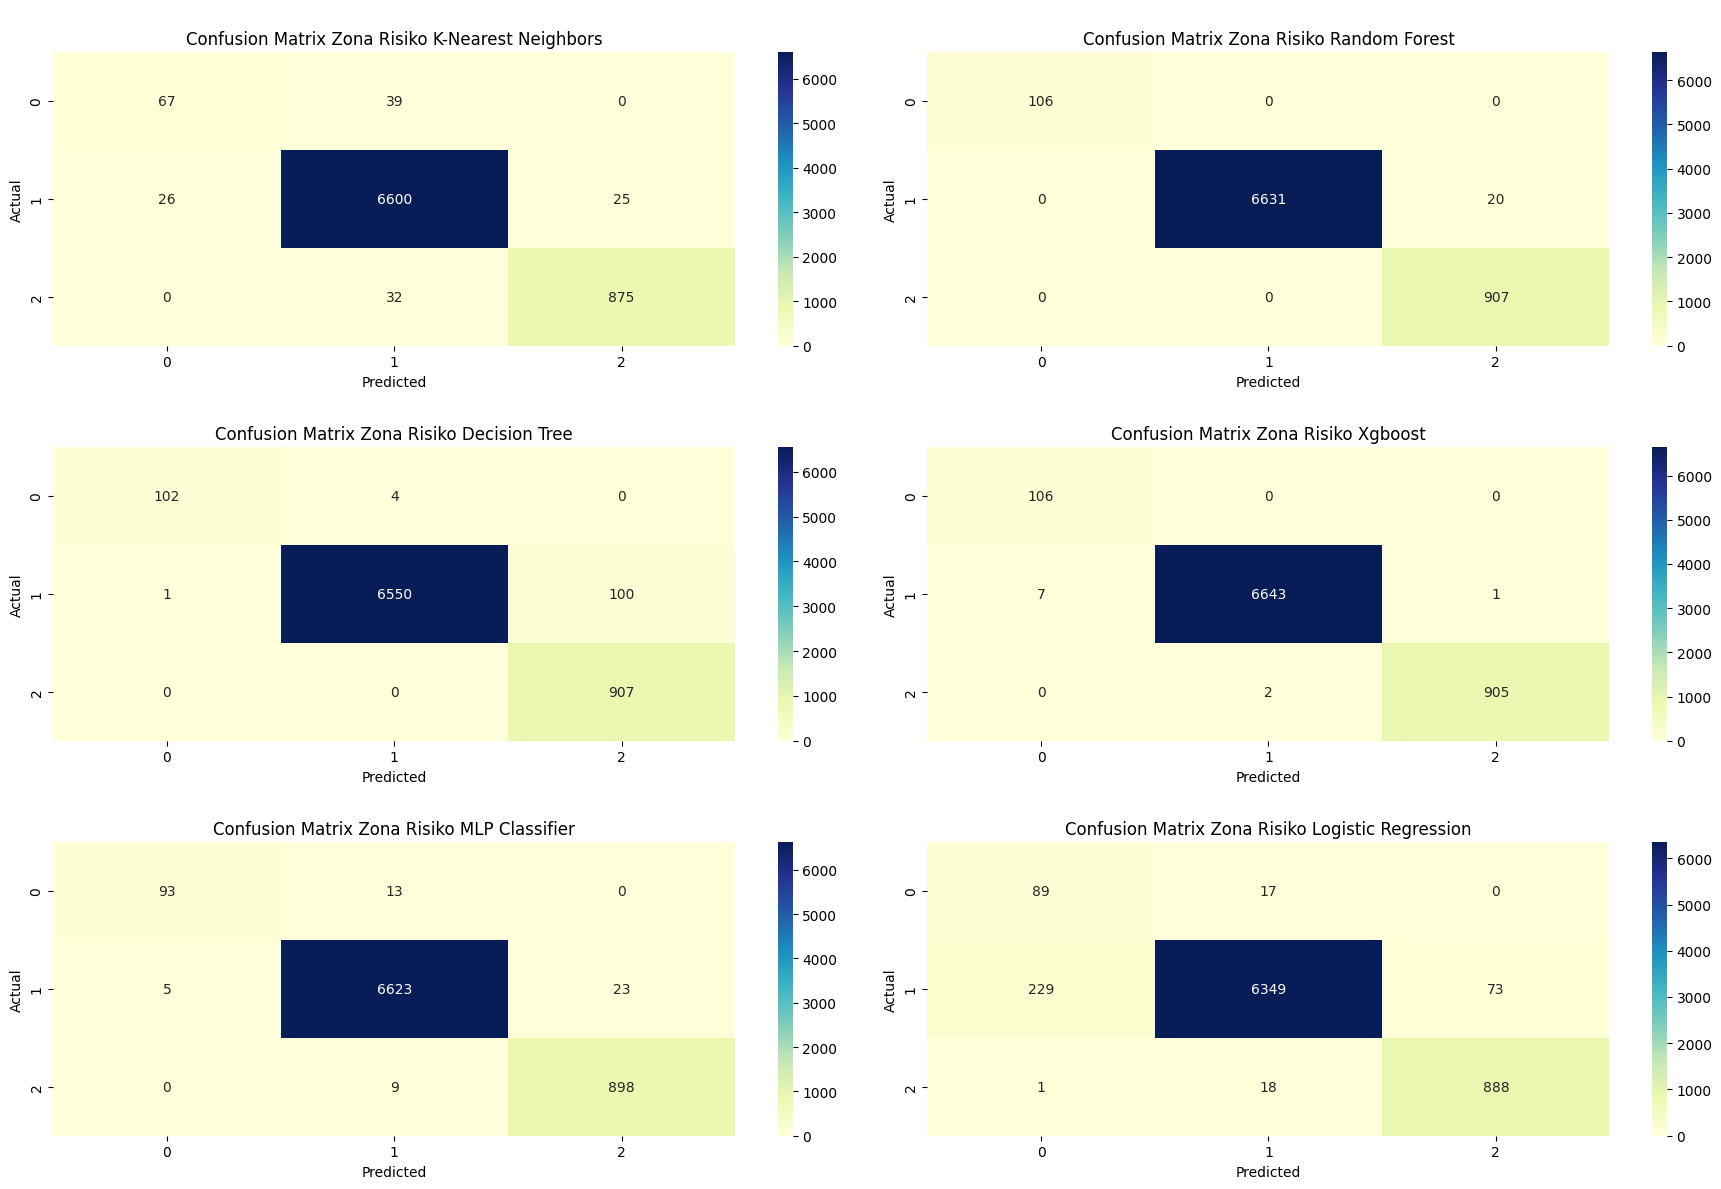

In [ ]:
# 8. Confusion Matrix

# --- Konfigurasi Grid Subplot ---
n_rows = 2 # Jumlah baris yang diinginkan
n_cols = 3 # Jumlah kolom yang diinginkan

plt.figure(figsize=(n_cols * 6,  n_rows * 6))

for i, (name, model) in enumerate(trained_models):
  y_pred = model.predict(X_test)
  ax = plt.subplot(n_cols, n_rows, i + 1)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
  plt.title(f'\nConfusion Matrix Zona Risiko {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

plt.tight_layout() # Menyesuaikan layout agar tidak ada tumpang tindih
plt.show()

In [ ]:
result_predict = pd.DataFrame(pred_test)
result_predict

,K-Nearest Neighbors,Random Forest,Decision Tree,Xgboost,MLP Classifier,Logistic Regression
0,1,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,2,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,2
...,...,...,...,...,...,...
7659,1,1,1,1,1,1
7660,1,1,1,1,1,1
7661,1,1,1,1,1,1
7662,1,1,1,1,1,1


In [ ]:
for model_name in result_predict.columns: # result_predict type Dataframe.
  print(f"\nModel: {model_name}")
  print(result_predict[model_name].value_counts())


Model: K-Nearest Neighbors
K-Nearest Neighbors
1    6671
2     900
0      93
Name: count, dtype: int64

Model: Random Forest
Random Forest
1    6631
2     927
0     106
Name: count, dtype: int64

Model: Decision Tree
Decision Tree
1    6554
2    1007
0     103
Name: count, dtype: int64

Model: Xgboost
Xgboost
1    6645
2     906
0     113
Name: count, dtype: int64

Model: MLP Classifier
MLP Classifier
1    6645
2     921
0      98
Name: count, dtype: int64

Model: Logistic Regression
Logistic Regression
1    6384
2     961
0     319
Name: count, dtype: int64


In [ ]:
y_test.value_counts()

,count
Zona Risiko Encode,
1,6651
2,907
0,106


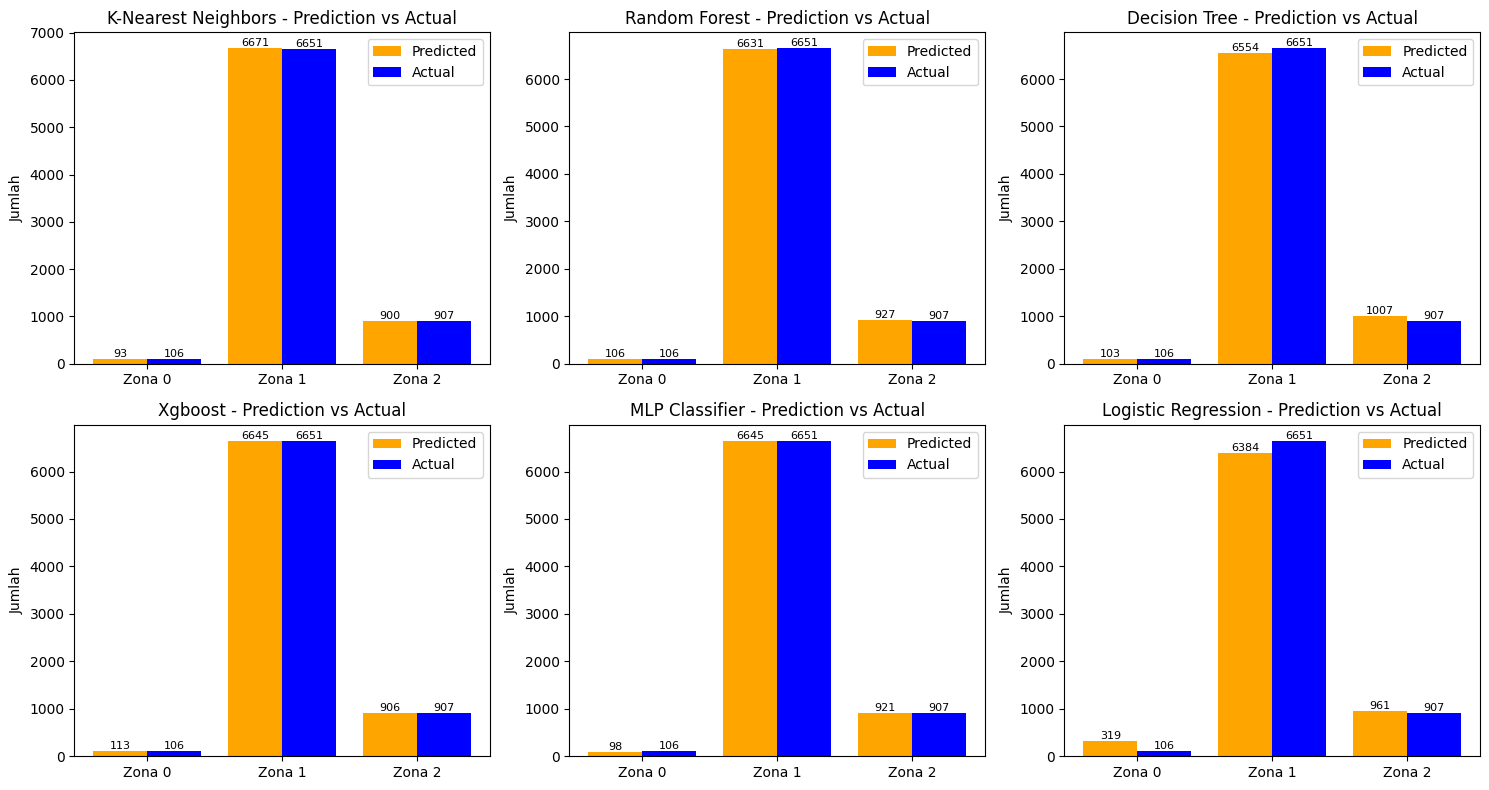

In [ ]:
# --- Konfigurasi Grid Subplot ---
n_rows = 2 # Jumlah baris yang diinginkan
n_cols = 3 # Jumlah kolom yang diinginkan

model_names = result_predict.columns # Ambil nama-nama model dari kolom result_predict

# Membuat Figure dan Subplot dengan grid yang diinginkan
# Sesuaikan figsize agar plot tidak terlalu kecil atau tumpang tindih
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
# axs sekarang adalah array 2D (contohnya axs[0,0], axs[0,1], dst)

for i, model in enumerate(model_names):
    # Hitung indeks baris dan kolom untuk subplot saat ini
    row_idx = i // n_cols # Pembagian bulat untuk mendapatkan indeks baris
    col_idx = i % n_cols  # Modulo untuk mendapatkan indeks kolom

    # Akses subplot yang benar menggunakan indeks 2D
    ax = axs[row_idx, col_idx]

    # Plot Prediksi
    # Perhatikan bahwa value_counts().index dan .values adalah Series/ndarray
    # Pastikan indeks hasil value_counts memiliki kategori yang sama untuk perbandingan
    # Mengisi kategori yang mungkin tidak ada di salah satu set dengan 0
    pred_counts = result_predict[model].value_counts().reindex([0, 1, 2], fill_value=0)
    actual_counts = y_test.value_counts().reindex([0, 1, 2], fill_value=0)

    # Plot Prediksi
    bars_pred  = ax.bar(pred_counts.index,
           pred_counts.values,
           width=0.4, label='Predicted', color='orange')

    # Menambahkan label nilai di atas setiap batang Plot Prediksi
    for bar in bars_pred:
      yval = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, # Posisi X: tengah bar
              yval + 0.5, # Posisi Y: sedikit di atas bar
              round(yval), # Teks: nilai bar (dibulatkan jika perlu)
              ha='center', va='bottom', fontsize=8) # Menyesuaikan posisi, warna dan ukuran font

    # Plot Aktual (geser sedikit untuk visualisasi berdampingan)
    bars_actual = ax.bar(actual_counts.index + 0.4, # Sesuaikan offset agar tidak tumpang tindih
           actual_counts.values,
           width=0.4, label='Actual', color='blue')

    # Menambahkan label nilai di atas setiap batang
    for bar in bars_actual:
      yval2 = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, # Posisi X: tengah bar
              yval2 + 0.5, # Posisi Y: sedikit di atas bar
              round(yval2), # Teks: nilai bar (dibulatkan jika perlu)
              ha='center', va='bottom', fontsize=8) # Menyesuaikan posisi, warna dan ukuran font

    ax.set_title(f'{model} - Prediction vs Actual')
    ax.set_xticks([0.2, 1.2, 2.2]) # Sesuaikan posisi tick agar di tengah bar jika ada offset
    ax.set_xticklabels(['Zona 0', 'Zona 1', 'Zona 2']) # Contoh label kategori
    ax.set_ylabel('Jumlah')
    ax.legend()

plt.tight_layout() # Menyesuaikan layout agar tidak ada tumpang tindih antar subplot
plt.show()

# **Result**

Hasil dari perhitungan untuk memprediksi zona risiko Covid-19 berdasarkan data dan mengevaluasi berbagai performa model klasifikasi dengan melakukan pendekatan balancing dan menggunakan teknik oversampling. Didapatkan temuan berikut ini :

1. Melakukan beberapa percobaan Undersampling yaitu SMOTE, ADASYN dan SMOTEN. Dimana SMOTEN menghasilkan GAP Accuracy training-testing dan testing-cv socre paling stabil <5% dibanding metode lainnya.
1. XGBoost dan Random Forest memiliki performa terbaik dalam hal akurasi dan distribusi prediksi antar kelas.
1. Logistic Regression menjadi model dengan performa paling stabil, namun untuk akurasi lebih rendah terkhusunya pada zona minoritas.
1. Teknik balancing sangat berpengaruh, terutama saat data target tidak seimbang.
